<a href="https://colab.research.google.com/github/JimenezHAnaFer/MetodosN/blob/main/Spline_cubico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Spline cúbico natural
# Condición: S''(x_0) = S''(x_n) = 0
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)

    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
xi = np.array([0.1 , 0.2, 0.3, 0.4])
fi = np.array([1.45, 1.8, 1.7, 2.0])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
 x = [0.1,0.2]
-146.666666666667*x**3 + 44.0*x**2 + 0.566666666666666*x + 1.1
 x = [0.2,0.3]
283.333333333333*x**3 - 214.0*x**2 + 52.1666666666667*x - 2.34
 x = [0.3,0.4]
-136.666666666667*x**3 + 164.0*x**2 - 61.2333333333333*x + 9.0


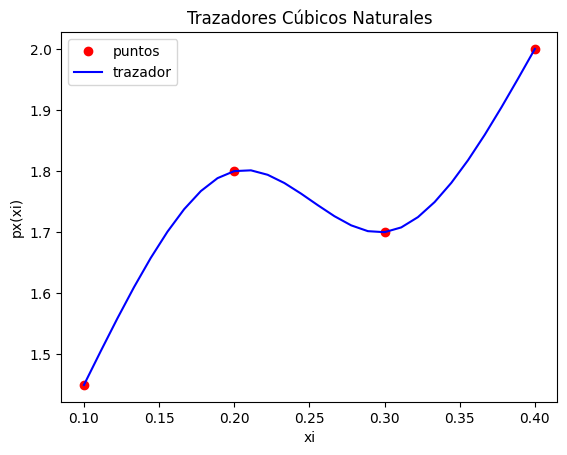

In [ ]:
# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

##Interpolación Spline cúbico

Usar la interpolación de Spline Cúbico en el problema de Runge.

Usemos la función
$$
f(x)=\frac{1}{1+25x^2}
$$

en el intervalo $x\in[-1,1]$

In [24]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

In [25]:
x=np.linspace(-1,1,15)
y=1/(1+25*x**2)
lineal=interpolate.interp1d(x,y,kind='linear')
xs=np.linspace(x.min(),x.max())
ys=lineal(xs)

In [17]:
sc=interpolate.interp1d(x,y,kind='cubic')
xs=np.linspace(x.min(),x.max())
yv=sc(xs)

In [18]:
pol=lagrange(x,y)
ypol=pol(xs)

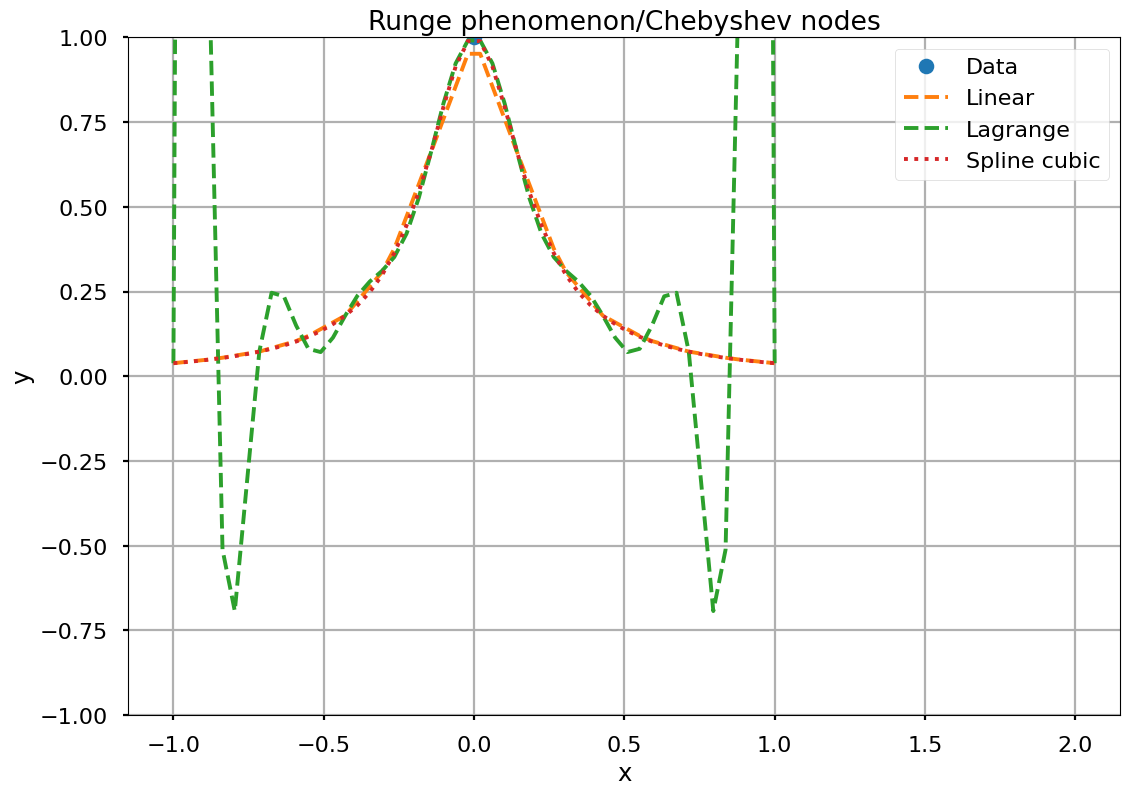

In [15]:
plt.plot(x,y,'o',xs,ys,'--',xs,ypol,'--',xs,yv,':')
plt.grid()
plt.legend(['Data','Linear','Lagrange','Spline cubic'])
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1,1])
plt.title('Runge phenomenon/Chebyshev nodes')
plt.show()

<ipython-input-14-60150cfe057e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


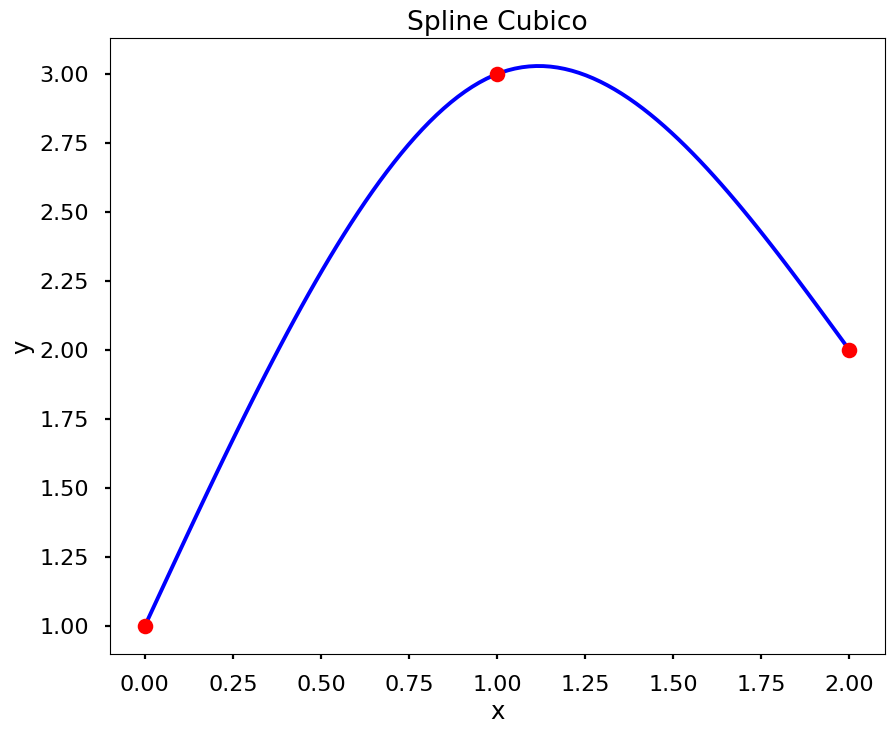

In [14]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = [0, 1, 2]
y = [1, 3, 2]


f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Spline Cubico')
plt.xlabel('x')
plt.ylabel('y')
plt.show()